In [1]:
# current ADAM resnet18 with 200 epochs is 76% accuracy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
from numpy import asarray
import PIL.Image as Image
import torch.nn as nn
import tqdm
import gc

device = "cuda"

torch.cuda.empty_cache()
gc.collect()
        
import torchvision.transforms as transforms
transform = transforms.ToTensor()

In [2]:
# get dataset stuffs
import torchvision
from torch.utils.data import DataLoader
from torchvision.models.utils import load_state_dict_from_url

transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset = torchvision.datasets.CIFAR10(root="based", train=False, download=True, transform=transform)

val_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


dataset = torchvision.datasets.CIFAR10(root="based", train=True, download=True, transform=transform)

train_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

0it [00:00, ?it/s]

Extracting based/cifar-10-python.tar.gz to based
Files already downloaded and verified


In [3]:
!pip install vit-pytorch

In [4]:
def testb():
    acc = 0
    total = 0
    for n_, (x, y) in enumerate(val_dataloader):
        x = x.to(device)
        bs = x.shape[0]
        x = x.reshape(bs, 3, 32, 32)
        
        y_hat = v(x) # add encodings?
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [5]:

import torch
from vit_pytorch import ViT

# get ViT-B/16 model

v = ViT(
    image_size = 32,
    patch_size = 16,
    num_classes = 10,
    dim = 768,
    depth = 12,
    heads = 12,
    mlp_dim = 3072,
    dropout = 0.1,
    emb_dropout = 0.1
)
v.train()

# initialize stuffs
losslist_n = []
v = v.to(device)
voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
import random

acc = 0
total = 0
# do loop for baseline
for epoch in range(150):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0
    # loop over data
    for n, (x, y) in enumerate(t):
        bs = x.shape[0]
        
        # change device to gpu
        x = x.to(device)
        y = y.to(device)
        
        # forward pass
        x = x.reshape(bs, 3, 32, 32)
        f_y_hat = v(x)
        
        # backward pass
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 10]), y) # nn.ReLU()
        loss.backward()
        tloss += loss
        
        # optimize
        voptimizer.step() 
        voptimizer.zero_grad()
        
        # keep track of this epoch's loss
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
        
    # test epoch's accuracy and append it to the list
    l = testb()
    print(l)
    losslist_n.append(l)
    
# 5 = 2 normal
# new 1.8 = 5

2.0038872543646367: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.3796


1.6626708361567284: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.4455


1.5541652757294324: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.4646


1.4818580783143336: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.4977


1.4260854915696748: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.5083


1.3873161783023757: 100%|██████████| 196/196 [00:46<00:00,  4.17it/s]


0.5252


1.349628682039222: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.5387


1.3203033135861766: 100%|██████████| 196/196 [00:47<00:00,  4.14it/s]


0.5345


1.292139481525032: 100%|██████████| 196/196 [00:47<00:00,  4.16it/s]


0.5519


1.2630145793058434: 100%|██████████| 196/196 [00:47<00:00,  4.17it/s]


0.5626


1.2380474635532923: 100%|██████████| 196/196 [00:47<00:00,  4.15it/s]


0.5502


1.2164256037498007: 100%|██████████| 196/196 [00:47<00:00,  4.16it/s]


0.5759


1.1913617970992108: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.5793


1.1627876904545997: 100%|██████████| 196/196 [00:47<00:00,  4.09it/s]


0.577


1.1490107166523835: 100%|██████████| 196/196 [00:47<00:00,  4.16it/s]


0.5899


1.1290896668726085: 100%|██████████| 196/196 [00:48<00:00,  4.08it/s]


0.5924


1.100613341039541: 100%|██████████| 196/196 [00:47<00:00,  4.15it/s]


0.5909


1.0892077076191804: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.5945


1.0679645149075254: 100%|██████████| 196/196 [00:47<00:00,  4.13it/s]


0.5991


1.0505381992885046: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.6038


1.0289138482541453: 100%|██████████| 196/196 [00:48<00:00,  4.05it/s]


0.615


1.014513366076411: 100%|██████████| 196/196 [00:47<00:00,  4.13it/s]


0.6165


0.9939238879145408: 100%|██████████| 196/196 [00:48<00:00,  4.04it/s]


0.6185


0.9747137731435348: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.622


0.9581262238171636: 100%|██████████| 196/196 [00:48<00:00,  4.01it/s]


0.6239


0.9385593180753746: 100%|██████████| 196/196 [00:47<00:00,  4.11it/s]


0.6299


0.9261255848164461: 100%|██████████| 196/196 [00:49<00:00,  3.99it/s]


0.6292


0.9030454985949458: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.6378


0.8927421569824219: 100%|██████████| 196/196 [00:48<00:00,  4.03it/s]


0.6337


0.8645732646085778: 100%|██████████| 196/196 [00:47<00:00,  4.10it/s]


0.6344


0.858774691211934: 100%|██████████| 196/196 [00:49<00:00,  3.96it/s]


0.6413


0.8385857562629544: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.639


0.8164607456752232: 100%|██████████| 196/196 [00:49<00:00,  3.93it/s]


0.6402


0.798797218167052: 100%|██████████| 196/196 [00:47<00:00,  4.09it/s]


0.6384


0.7828031267438617: 100%|██████████| 196/196 [00:49<00:00,  3.98it/s]


0.6462


0.7661659863530373: 100%|██████████| 196/196 [00:48<00:00,  4.07it/s]


0.6458


0.74544501791195: 100%|██████████| 196/196 [00:50<00:00,  3.89it/s]


0.6471


0.7245091808085539: 100%|██████████| 196/196 [00:48<00:00,  4.07it/s]


0.643


0.7138995735012755: 100%|██████████| 196/196 [00:48<00:00,  4.04it/s]


0.6507


0.6911511323889907: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6511


0.6732470454001913: 100%|██████████| 196/196 [00:48<00:00,  4.08it/s]


0.6534


0.6566395662268814: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6482


0.6373866334253427: 100%|██████████| 196/196 [00:47<00:00,  4.14it/s]


0.6462


0.6199373517717633: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.6507


0.5960622125742386: 100%|██████████| 196/196 [00:48<00:00,  4.07it/s]


0.6546


0.5828680310930524: 100%|██████████| 196/196 [00:47<00:00,  4.15it/s]


0.6499


0.5616452742596062: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6542


0.5472646830033283: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.6545


0.52763218782386: 100%|██████████| 196/196 [00:48<00:00,  4.05it/s]


0.6549


0.5067946375632773: 100%|██████████| 196/196 [00:48<00:00,  4.07it/s]


0.6517


0.49751659315459584: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6529


0.47520668652592873: 100%|██████████| 196/196 [00:48<00:00,  4.03it/s]


0.6543


0.45618757909658003: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.653


0.44040644898706555: 100%|██████████| 196/196 [00:48<00:00,  4.03it/s]


0.6538


0.421965774224729: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


0.6525


0.4062489879374601: 100%|██████████| 196/196 [00:48<00:00,  4.05it/s]


0.6547


0.3960022050507215: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6503


0.37651828843720103: 100%|██████████| 196/196 [00:48<00:00,  4.05it/s]


0.6586


0.367946702606824: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6559


0.3535279254524075: 100%|██████████| 196/196 [00:48<00:00,  4.01it/s]


0.6545


0.33699401544064894: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6565


0.32612434698610887: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6582


0.3213639356652085: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6586


0.3084555061496034: 100%|██████████| 196/196 [00:48<00:00,  4.01it/s]


0.6551


0.29384838804906727: 100%|██████████| 196/196 [00:49<00:00,  4.00it/s]


0.6537


0.2840899642632932: 100%|██████████| 196/196 [00:49<00:00,  3.95it/s]


0.6574


0.2732042195845623: 100%|██████████| 196/196 [00:46<00:00,  4.25it/s]


0.6491


0.2584893557490135: 100%|██████████| 196/196 [00:49<00:00,  3.99it/s]


0.649


0.2573666086002272: 100%|██████████| 196/196 [00:49<00:00,  3.99it/s]


0.655


0.24185396700489278: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.6536


0.23298936960648517: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.651


0.22881535121372767: 100%|██████████| 196/196 [00:49<00:00,  3.94it/s]


0.6508


0.2236861598734953: 100%|██████████| 196/196 [00:48<00:00,  4.01it/s]


0.648


0.22028590221794284: 100%|██████████| 196/196 [00:47<00:00,  4.14it/s]


0.6488


0.2094788259389449: 100%|██████████| 196/196 [00:48<00:00,  4.07it/s]


0.6527


0.20411218915666854: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6524


0.19834962183115434: 100%|██████████| 196/196 [00:49<00:00,  3.95it/s]


0.654


0.19043437802061744: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6474


0.1896098195290079: 100%|██████████| 196/196 [00:49<00:00,  3.98it/s]


0.6524


0.18539494884257413: 100%|██████████| 196/196 [00:49<00:00,  3.93it/s]


0.6526


0.1800394058227539: 100%|██████████| 196/196 [00:48<00:00,  4.01it/s]


0.6517


0.1710018235809949: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.655


0.16671229381950534: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6522


0.1633251735142299: 100%|██████████| 196/196 [00:50<00:00,  3.92it/s]


0.6513


0.15773359610109913: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6535


0.15992169477501694: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6505


0.1551133175285495: 100%|██████████| 196/196 [00:49<00:00,  3.95it/s]


0.6504


0.15384805445768396: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6523


0.14492000852312362: 100%|██████████| 196/196 [00:49<00:00,  3.93it/s]


0.6539


0.14364346679376097: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6602


0.1358644913653938: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6448


0.13949586907211614: 100%|██████████| 196/196 [00:50<00:00,  3.92it/s]


0.6484


0.13720477357202646: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.6575


0.13985991964534839: 100%|██████████| 196/196 [00:48<00:00,  4.03it/s]


0.6506


0.13478776386805943: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6508


0.1221874392762476: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6548


0.12238978366462552: 100%|██████████| 196/196 [00:50<00:00,  3.89it/s]


0.6563


0.12384086725663165: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6547


0.12341350438643475: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6519


0.12234000770413146: 100%|██████████| 196/196 [00:49<00:00,  3.95it/s]


0.6497


0.11604677900976064: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6512


0.11081204122426558: 100%|██████████| 196/196 [00:50<00:00,  3.88it/s]


0.6481


0.1144253769699408: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6533


0.11090664960900132: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6507


0.11325171529030313: 100%|██████████| 196/196 [00:50<00:00,  3.87it/s]


0.6563


0.1103841917855399: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6528


0.10421053244143116: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6504


0.10512627387533383: 100%|██████████| 196/196 [00:48<00:00,  4.03it/s]


0.6483


0.10230788406060666: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6495


0.10466946387777523: 100%|██████████| 196/196 [00:50<00:00,  3.87it/s]


0.6504


0.0994717636886908: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6543


0.10082032729168328: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6452


0.1035910431219607: 100%|██████████| 196/196 [00:50<00:00,  3.88it/s]


0.6553


0.09731787078234615: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.6543


0.09672023812118842: 100%|██████████| 196/196 [00:47<00:00,  4.10it/s]


0.6531


0.09151866484661492: 100%|██████████| 196/196 [00:48<00:00,  4.07it/s]


0.6565


0.0951683083359076: 100%|██████████| 196/196 [00:46<00:00,  4.17it/s]


0.6573


0.09117992556824976: 100%|██████████| 196/196 [00:50<00:00,  3.86it/s]


0.6525


0.08730276263490015: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6473


0.08867059435163226: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6534


0.08994626998901367: 100%|██████████| 196/196 [00:50<00:00,  3.84it/s]


0.6522


0.08933186044498366: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6484


0.08892171236933494: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.6482


0.0867818326366191: 100%|██████████| 196/196 [00:47<00:00,  4.09it/s]


0.6542


0.0816611367828992: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.651


0.07761729493433116: 100%|██████████| 196/196 [00:51<00:00,  3.83it/s]


0.6477


0.08367336039640466: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6555


0.08345694444617446: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6498


0.08266102537816884: 100%|██████████| 196/196 [00:51<00:00,  3.82it/s]


0.6526


0.08308969225202288: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6534


0.0831464164111079: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.6554


0.07951659085799237: 100%|██████████| 196/196 [00:48<00:00,  4.01it/s]


0.6525


0.07659734998430524: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


0.6534


0.07241550756960499: 100%|██████████| 196/196 [00:51<00:00,  3.82it/s]


0.6499


0.07718635091976243: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6482


0.07529470871905891: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6531


0.07303719617882554: 100%|██████████| 196/196 [00:51<00:00,  3.81it/s]


0.6497


0.07698296040904765: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.6544


0.07097186361040388: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6519


0.07636814701313875: 100%|██████████| 196/196 [00:52<00:00,  3.73it/s]


0.6531


0.07568184696898168: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6477


0.07370666581757214: 100%|██████████| 196/196 [00:49<00:00,  4.00it/s]


0.6469


0.07070925284405144: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6509


0.071658299893749: 100%|██████████| 196/196 [00:47<00:00,  4.15it/s]


0.6457


0.0722934323914197: 100%|██████████| 196/196 [00:51<00:00,  3.78it/s]


0.6455


0.06650810339012925: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6465


0.07280542899151238: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6532


0.06464651166176309: 100%|██████████| 196/196 [00:52<00:00,  3.74it/s]


0.6476


0.06497088257147342: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6504


0.06620306871375259: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6492


In [6]:
# load in ViT-b/16 results from the above code ran in previous version, I seperated these two in case the session was terminated and the data would be lost
#losslist_n = [0.4132, 0.4589, 0.4987, 0.5169, 0.5235, 0.5364, 0.5478, 0.5506, 0.5717, 0.5792, 0.5831, 0.5864, 0.5893, 0.6025, 0.6018, 0.6065, 0.6184, 0.6211, 0.6271, 0.6323, 0.6419, 0.6393, 0.6411, 0.6347, 0.6511, 0.6335, 0.6427, 0.6492, 0.6545, 0.6598, 0.6503, 0.6579, 0.6585, 0.6531, 0.6611, 0.654, 0.6652, 0.6619, 0.6526, 0.6564, 0.6616, 0.6582, 0.6554, 0.6551, 0.6645, 0.6569, 0.661, 0.6624, 0.6601, 0.6617, 0.6651, 0.6571, 0.6634, 0.6592, 0.6612, 0.6616, 0.658, 0.6544, 0.6561, 0.6609, 0.6583, 0.6648, 0.6632, 0.6538, 0.6563, 0.6633, 0.6613, 0.6632, 0.6573, 0.6556, 0.6605, 0.658, 0.651, 0.6596, 0.656, 0.6612, 0.6576, 0.6606, 0.6634, 0.6628, 0.6552, 0.6631, 0.664, 0.6641, 0.6595, 0.6637, 0.6614, 0.6614, 0.6638, 0.6586, 0.659, 0.6594, 0.66, 0.6543, 0.6591, 0.6605, 0.6609, 0.6568, 0.6542, 0.6607, 0.663, 0.6613, 0.6678, 0.661, 0.655, 0.6531, 0.6492, 0.6611, 0.6595, 0.6584, 0.6588, 0.6593, 0.6574, 0.6606, 0.6586, 0.6616, 0.6577, 0.6549, 0.6584, 0.6619, 0.6613, 0.664, 0.6595, 0.6538, 0.6592, 0.6635, 0.6616, 0.6605, 0.6662, 0.6612, 0.6592, 0.6602, 0.6652, 0.6531, 0.6565, 0.6587, 0.6625, 0.6523, 0.6555, 0.6516, 0.6556, 0.6652, 0.6562, 0.6606, 0.6579, 0.6619, 0.6603, 0.6587, 0.6581, 0.6595, 0.6608, 0.6513, 0.6601, 0.6558, 0.6517, 0.6547, 0.6585, 0.6552, 0.6577, 0.6558, 0.6556, 0.6545, 0.661, 0.6599, 0.6576, 0.6587, 0.6582, 0.6582, 0.6573, 0.6561, 0.6563, 0.6605, 0.6571, 0.6582, 0.6578, 0.6592, 0.6573, 0.6543, 0.6528, 0.6584, 0.6562, 0.6602, 0.6615, 0.6558, 0.6614, 0.6611, 0.6625, 0.6606, 0.6553, 0.6602, 0.6592, 0.652, 0.6589, 0.6614, 0.6592, 0.6584, 0.6577, 0.6503, 0.6521, 0.6554]
print(losslist_n)

[0.3796, 0.4455, 0.4646, 0.4977, 0.5083, 0.5252, 0.5387, 0.5345, 0.5519, 0.5626, 0.5502, 0.5759, 0.5793, 0.577, 0.5899, 0.5924, 0.5909, 0.5945, 0.5991, 0.6038, 0.615, 0.6165, 0.6185, 0.622, 0.6239, 0.6299, 0.6292, 0.6378, 0.6337, 0.6344, 0.6413, 0.639, 0.6402, 0.6384, 0.6462, 0.6458, 0.6471, 0.643, 0.6507, 0.6511, 0.6534, 0.6482, 0.6462, 0.6507, 0.6546, 0.6499, 0.6542, 0.6545, 0.6549, 0.6517, 0.6529, 0.6543, 0.653, 0.6538, 0.6525, 0.6547, 0.6503, 0.6586, 0.6559, 0.6545, 0.6565, 0.6582, 0.6586, 0.6551, 0.6537, 0.6574, 0.6491, 0.649, 0.655, 0.6536, 0.651, 0.6508, 0.648, 0.6488, 0.6527, 0.6524, 0.654, 0.6474, 0.6524, 0.6526, 0.6517, 0.655, 0.6522, 0.6513, 0.6535, 0.6505, 0.6504, 0.6523, 0.6539, 0.6602, 0.6448, 0.6484, 0.6575, 0.6506, 0.6508, 0.6548, 0.6563, 0.6547, 0.6519, 0.6497, 0.6512, 0.6481, 0.6533, 0.6507, 0.6563, 0.6528, 0.6504, 0.6483, 0.6495, 0.6504, 0.6543, 0.6452, 0.6553, 0.6543, 0.6531, 0.6565, 0.6573, 0.6525, 0.6473, 0.6534, 0.6522, 0.6484, 0.6482, 0.6542, 0.651, 0.6477, 0.65

In [7]:
def test(f):
    acc = 0
    total = 0
    # loop over test set
    for n_, (x, y) in enumerate(val_dataloader):
        bs = x.shape[0]
        x = x.to(device)
        
        # f is how many times ViT loops over data
        for i in range(f):
            x = v(x)
            x = nn.ReLU()(b(x))
            x = x.reshape(bs, 3, 32, 32)
            
        # apply Head
        y_hat = Head(x)
        
        # loop over predicted and see if equal to the ground truth
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [8]:
# blank module to replace nn.Softmaxes with
class make_linear(torch.nn.Module):
    def __init__(self):
        super(make_linear, self).__init__()

    def forward(self, x):
        return x

In [9]:
def replace_layers(model, old, new):
    # stolen from stack overflow, replaces all non linearities so that transformers are linear
    for n, module in model.named_children():
        if len(list(module.children())) > 0:
            ## compound module, go inside it
            replace_layers(module, old, new)
            
        if isinstance(module, old):
            ## simple module
            setattr(model, n, new)

In [10]:
import torch
from vit_pytorch import ViT

v = ViT(
    image_size = 32,
    patch_size = 16,
    num_classes = 3072,
    dim = 768,
    depth = 12,
    heads = 12,
    mlp_dim = 1024,
    dropout = 0.1,
    emb_dropout = 0.1
)

#from pytorch_pretrained_vit import ViT
#model = ViT('B_16_imagenet1k', pretrained=True)

v.train()
#v = torch.nn.Sequential(*(list(v.children())[:-1])) # get rid of MLP dim
# MLP dim consists of Layernorm and then activationless FC
#v = torch.nn.Sequential(*(list(v.children()) + [nn.BatchNorm1d(4)])) #
#replace_layers(v, nn.Softmax, make_linear())

losslist_r = []

#Head = torch.nn.Sequential(*(list([ViT(image_size=32, patch_size=32, num_classes=10, dim=768, depth=1, heads=4, mlp_dim=3072)]))) # might want to increase head size bc the ViT is just interpresting patterns this actually makes decision
Head = torch.nn.Sequential(*(list([nn.Flatten(), nn.LayerNorm(3072), nn.Linear(3072, 100)])))

b = nn.BatchNorm1d(3072).to(device)
v = v.to(device)
Head = Head.to(device)

boptimizer = torch.optim.Adam(b.parameters(), lr=.0001)
voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
hoptimizer = torch.optim.Adam(Head.parameters(), lr=.0001)
import random
import time

timelist_r = []

loops = 2 # might need to reward not having vanishing things, right now problem is prob that numbers get smaller and smaller - actually use Batch norm

acc = 0
total = 0
stime = time.time()
for epoch in range(150):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0

    for n, (x, y) in enumerate(t):
        bs = x.shape[0]
        x = x.to(device)
        #print(x.shape)
        y = y.to(device)
        
        for i in range(loops):
            
            x = v(x)
            x = nn.ReLU()(b(x))
            x = x.reshape(bs, 3, 32, 32)
            #print(x[0][0][0])
            #print(x.shape)

        f_y_hat = Head(x)
        
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 100]), y) # nn.ReLU()
        loss.backward()
        tloss += loss

        hoptimizer.step() 
        hoptimizer.zero_grad()
        voptimizer.step() 
        voptimizer.zero_grad()
        boptimizer.step() 
        boptimizer.zero_grad()
        
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
    l = test(loops)
    print(l)
    losslist_r.append(l)
    timelist_r.append(time.time() - stime)

2.441614112075494: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.2963


1.8903962738659916: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.3765


1.8757369372309471: 100%|██████████| 196/196 [00:58<00:00,  3.34it/s]


0.3452


1.718468646613919: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.4128


1.6627894810267858: 100%|██████████| 196/196 [00:59<00:00,  3.31it/s]


0.4279


1.6014475919762436: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.4509


1.5560592339963328: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]


0.4612


1.5175650460379464: 100%|██████████| 196/196 [00:57<00:00,  3.42it/s]


0.4719


1.4825475264568717: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.4912


1.4564883173728476: 100%|██████████| 196/196 [00:59<00:00,  3.31it/s]


0.4917


1.471268011599171: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]


0.4992


1.41217041015625: 100%|██████████| 196/196 [00:55<00:00,  3.51it/s]


0.5073


1.38015451236647: 100%|██████████| 196/196 [00:54<00:00,  3.59it/s]


0.5224


1.4632423556580836: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.3625


1.4964680574378189: 100%|██████████| 196/196 [00:59<00:00,  3.30it/s]


0.5083


1.3752111318160076: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.5184


1.3405942332987884: 100%|██████████| 196/196 [00:58<00:00,  3.35it/s]


0.5349


1.3161085479113521: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.5348


1.2990855002889827: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.5407


1.2833913686324139: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.5481


1.2654675074986048: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.5539


1.2574457441057478: 100%|██████████| 196/196 [00:59<00:00,  3.31it/s]


0.5598


1.2377529533541933: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.5583


1.2310308339644451: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.5594


1.2116641609036192: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.5694


1.1977441748794244: 100%|██████████| 196/196 [00:58<00:00,  3.36it/s]


0.5713


1.1884261150749362: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.5695


1.1728805230588328: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]


0.571


1.1615144379284916: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.5759


1.1456892830984933: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.5816


1.1351788579201212: 100%|██████████| 196/196 [00:59<00:00,  3.27it/s]


0.5811


1.1197550248126595: 100%|██████████| 196/196 [00:54<00:00,  3.63it/s]


0.5871


1.113510053984973: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.5921


1.1014844154825016: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]


0.5941


1.0846366882324219: 100%|██████████| 196/196 [00:57<00:00,  3.44it/s]


0.5935


1.079356913663903: 100%|██████████| 196/196 [00:55<00:00,  3.55it/s]


0.6018


1.0619818239795917: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6049


1.0499026240134726: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6062


1.0357476059271364: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.614


1.0266541461555325: 100%|██████████| 196/196 [01:00<00:00,  3.22it/s]


0.615


1.0115825886629066: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6164


1.004294337058554: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]


0.6154


0.9922895626145967: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.6142


0.9769152427206234: 100%|██████████| 196/196 [00:56<00:00,  3.45it/s]


0.6247


0.9688707468461017: 100%|██████████| 196/196 [00:56<00:00,  3.46it/s]


0.6219


0.9589920043945312: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6208


0.9387135408362564: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6294


0.930398668561663: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6285


0.9162919180733817: 100%|██████████| 196/196 [01:00<00:00,  3.25it/s]


0.6379


0.9048623065559231: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6314


0.8928671077806123: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6368


0.8851156429368623: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6356


0.8711065954091598: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]


0.6378


0.8635865036322146: 100%|██████████| 196/196 [00:57<00:00,  3.38it/s]


0.6412


0.8477584683165258: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6341


0.8367649000518176: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6429


0.8274740102339764: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]


0.6371


0.817187095174984: 100%|██████████| 196/196 [01:00<00:00,  3.24it/s]


0.6451


0.8036970021773358: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6434


0.7918306467484455: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6363


0.7804656515316087: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6478


0.769246938277264: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6472


0.761362192582111: 100%|██████████| 196/196 [01:01<00:00,  3.19it/s]


0.6466


0.7396062734175701: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]


0.6507


0.7297376515913983: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6466


0.7226624002262038: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6433


0.7112758402921715: 100%|██████████| 196/196 [00:57<00:00,  3.42it/s]


0.6524


0.7017369173011001: 100%|██████████| 196/196 [00:56<00:00,  3.50it/s]


0.648


0.6856163180604273: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6544


0.6785110162228954: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6523


0.6621410603425941: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.6495


0.6483715213074976: 100%|██████████| 196/196 [01:01<00:00,  3.17it/s]


0.6565


0.6401419736901108: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.655


0.6317744352379624: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6523


0.6175013950892857: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6518


0.6087205069405692: 100%|██████████| 196/196 [00:54<00:00,  3.60it/s]


0.6533


0.6022192118119221: 100%|██████████| 196/196 [00:59<00:00,  3.28it/s]


0.662


0.5864214215959821: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6559


0.5707397850192323: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6548


0.5656298423299984: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.656


0.548814228602818: 100%|██████████| 196/196 [01:00<00:00,  3.25it/s]


0.6639


0.5349274849405095: 100%|██████████| 196/196 [00:54<00:00,  3.62it/s]


0.6567


0.5257758315728636: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6588


0.5235079940484495: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.655


0.5125412065155652: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]


0.6547


0.498195726044324: 100%|██████████| 196/196 [01:01<00:00,  3.16it/s]


0.6561


0.4888522478998924: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.657


0.4750964106345663: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6615


0.46562124758350604: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6602


0.4572939191545759: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]


0.6595


0.4460971598722497: 100%|██████████| 196/196 [01:00<00:00,  3.26it/s]


0.6628


0.4356608877376634: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6613


0.42558557160046634: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6632


0.42166199976084184: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6687


0.41148259688396843: 100%|██████████| 196/196 [00:59<00:00,  3.30it/s]


0.6628


0.40017626236896126: 100%|██████████| 196/196 [00:55<00:00,  3.56it/s]


0.6582


0.3925549643380301: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6574


0.38378649341816806: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6559


0.3726787567138672: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.657


0.3707793099539621: 100%|██████████| 196/196 [01:02<00:00,  3.14it/s]


0.6647


0.35546653124750877: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.666


0.35245377676827566: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6613


0.34863647149533644: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6666


0.3333994807029257: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]


0.6596


0.3264984403337751: 100%|██████████| 196/196 [01:02<00:00,  3.15it/s]


0.6617


0.3259636431324239: 100%|██████████| 196/196 [00:52<00:00,  3.73it/s]


0.6597


0.3127075312088947: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6636


0.31277212804677534: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6635


0.29936718454166333: 100%|██████████| 196/196 [00:56<00:00,  3.49it/s]


0.6601


0.29883676645707113: 100%|██████████| 196/196 [00:59<00:00,  3.32it/s]


0.6622


0.287653670019033: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6645


0.2783580312923509: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6524


0.2749938186334104: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6589


0.2711173271646305: 100%|██████████| 196/196 [00:59<00:00,  3.28it/s]


0.6579


0.26515160774698066: 100%|██████████| 196/196 [00:54<00:00,  3.60it/s]


0.6581


0.25869931980055205: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6571


0.2577021267949318: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6599


0.2549389430454799: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6596


0.24478803362165177: 100%|██████████| 196/196 [01:03<00:00,  3.08it/s]


0.663


0.2385746702855947: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6554


0.23892042588214485: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6676


0.2343860353742327: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6615


0.23275206040362922: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.6557


0.22339470532475686: 100%|██████████| 196/196 [01:03<00:00,  3.08it/s]


0.6649


0.2152726309640067: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6611


0.21707040436413824: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.6595


0.21144296685043645: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6604


0.21103524188606107: 100%|██████████| 196/196 [00:55<00:00,  3.54it/s]


0.6595


0.19810567583356584: 100%|██████████| 196/196 [00:59<00:00,  3.31it/s]


0.658


0.19845365018260722: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6675


0.19477122170584543: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6592


0.19603254357162786: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6664


0.19140064473054846: 100%|██████████| 196/196 [00:58<00:00,  3.34it/s]


0.6568


0.18639583976901308: 100%|██████████| 196/196 [00:56<00:00,  3.47it/s]


0.6594


0.1829049052024374: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6619


0.1792423287216498: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6628


0.18402198869354872: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]


0.6606


0.179476193019322: 100%|██████████| 196/196 [01:02<00:00,  3.16it/s]


0.6636


0.17498072799371214: 100%|██████████| 196/196 [00:54<00:00,  3.62it/s]


0.6578


0.16773626755694954: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6573


0.16724099918287627: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6594


0.16543869096405653: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6649


0.1684517763098892: 100%|██████████| 196/196 [01:04<00:00,  3.04it/s]


0.6618


0.16260147094726562: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]


0.6576


0.15784741421135104: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6565


0.15578675756649096: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]


0.6573


0.15535190154095085: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6626


0.15279267758739237: 100%|██████████| 196/196 [01:04<00:00,  3.04it/s]


0.6661


0.15442474520936303: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]


0.6653


0.15472383888400332: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]


0.6692


In [11]:
test(loops)

0.6606

In [12]:
print(losslist_r)

[0.2963, 0.3765, 0.3452, 0.4128, 0.4279, 0.4509, 0.4612, 0.4719, 0.4912, 0.4917, 0.4992, 0.5073, 0.5224, 0.3625, 0.5083, 0.5184, 0.5349, 0.5348, 0.5407, 0.5481, 0.5539, 0.5598, 0.5583, 0.5594, 0.5694, 0.5713, 0.5695, 0.571, 0.5759, 0.5816, 0.5811, 0.5871, 0.5921, 0.5941, 0.5935, 0.6018, 0.6049, 0.6062, 0.614, 0.615, 0.6164, 0.6154, 0.6142, 0.6247, 0.6219, 0.6208, 0.6294, 0.6285, 0.6379, 0.6314, 0.6368, 0.6356, 0.6378, 0.6412, 0.6341, 0.6429, 0.6371, 0.6451, 0.6434, 0.6363, 0.6478, 0.6472, 0.6466, 0.6507, 0.6466, 0.6433, 0.6524, 0.648, 0.6544, 0.6523, 0.6495, 0.6565, 0.655, 0.6523, 0.6518, 0.6533, 0.662, 0.6559, 0.6548, 0.656, 0.6639, 0.6567, 0.6588, 0.655, 0.6547, 0.6561, 0.657, 0.6615, 0.6602, 0.6595, 0.6628, 0.6613, 0.6632, 0.6687, 0.6628, 0.6582, 0.6574, 0.6559, 0.657, 0.6647, 0.666, 0.6613, 0.6666, 0.6596, 0.6617, 0.6597, 0.6636, 0.6635, 0.6601, 0.6622, 0.6645, 0.6524, 0.6589, 0.6579, 0.6581, 0.6571, 0.6599, 0.6596, 0.663, 0.6554, 0.6676, 0.6615, 0.6557, 0.6649, 0.6611, 0.6595, 0.6

In [13]:
torch.save(v.state_dict(), "vn")
torch.save(Head.state_dict(), "Hn")

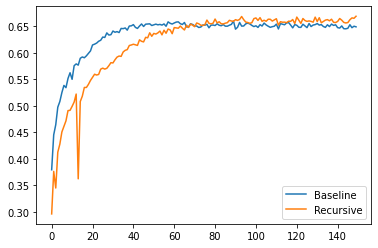

In [14]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(losslist_n))), losslist_n, label="Baseline")
plt.plot(list(range(len(losslist_r))), losslist_r, label="Recursive")
plt.legend()
plt.show()